In [ ]:
import zipfile
with zipfile.ZipFile("/content/BitFinexData.zip", "r") as zipf:
  zipf.extractall("/content/bitfinex/")

Источник https://www.cryptodatadownload.com/data/bitfinex/

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pandas as pd

btc = pd.read_csv('/content/bitfinex/Bitfinex_BTCUSD_d.csv', skiprows=1)

btc.set_index("unix", inplace=True)
btc = btc[::-1]
btc.reset_index(inplace=True)
btc.drop("unix", axis=1, inplace=True)

btc['date'] = pd.to_datetime(btc['date'])

btc

,date,symbol,open,high,low,close,Volume USD,Volume BTC
0,2015-02-09,BTC/USD,224.220000,225.000000,215.40,220.61,6.493501e+06,29625.030000
1,2015-02-10,BTC/USD,220.610000,223.880000,214.00,220.96,6.402351e+06,29268.950000
2,2015-02-11,BTC/USD,220.960000,224.400000,218.10,219.19,4.268987e+06,19289.280000
3,2015-02-12,BTC/USD,219.190000,223.200000,217.87,222.60,2.468883e+06,11190.650000
4,2015-02-13,BTC/USD,222.390000,241.760000,221.46,236.00,6.806973e+06,29079.110000
...,...,...,...,...,...,...,...,...
2251,2021-04-09,BTC/USD,58110.000000,58880.000000,57713.00,58134.00,2.179731e+08,3749.493697
2252,2021-04-10,BTC/USD,58134.090643,61243.000000,57900.00,59812.00,5.858312e+08,9794.542479
2253,2021-04-11,BTC/USD,59817.073785,60722.000000,59308.00,60032.00,2.789436e+08,4646.581998
2254,2021-04-12,BTC/USD,60033.000000,61338.000000,59492.00,59874.00,3.291828e+08,5497.925195


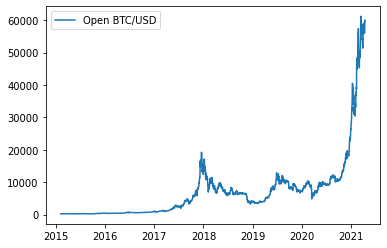

In [ ]:
import matplotlib.pyplot as plt


%matplotlib inline

plt.plot(btc['date'], btc['open'], label="Open BTC/USD")
plt.legend()  #  Отобразить легенду
plt.show()  #  Отобразить график

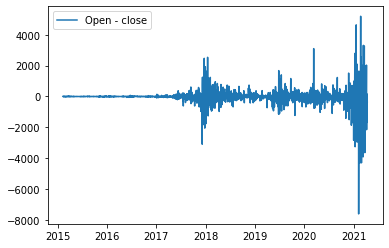

In [ ]:
plt.plot(btc['date'], btc['open'] - btc['close'], label="Open - close")
plt.legend()  #  Отобразить легенду
plt.show()  #  Отобразить график

In [ ]:
#  Feature Enginnering
#  Добавление новых колонок на основе имеющихся.

btc['open_close_diff'] = btc['open'] - btc['close']
btc['high_low_diff'] = btc['high'] - btc['low']
btc['open_to_high'] = btc['open_close_diff'] / btc['high_low_diff']

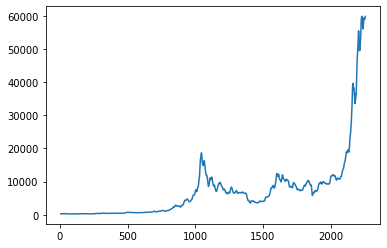

In [ ]:
btc['high'].rolling(window=7).mean().plot()  #  Средняя цена за 7 дней

In [ ]:
btc['high_mean_7d'] = btc['high'].shift(1).rolling(window=7).mean()
btc['max_open_14d'] = btc['open'].shift(1).rolling(window=14).max()
btc['min_close_14d'] = btc['close'].shift(1).rolling(window=14).min()

In [ ]:
btc.groupby(btc['date'].dt.weekday)['Volume BTC'].mean()

date
0    20087.930843
1    21382.213443
2    22357.596736
3    22522.741447
4    22583.815357
5    16753.001831
6    16875.033304
Name: Volume BTC, dtype: float64

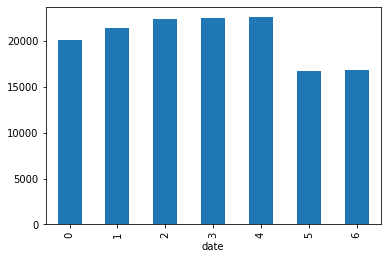

In [ ]:
btc.groupby(btc['date'].dt.weekday)['Volume BTC'].mean().plot(kind='bar')

In [ ]:
for day in range(1, 8):
  btc[f'close_{day}d'] = btc['close'].shift(day)

In [ ]:
btc.head(20)

,date,symbol,open,high,low,close,Volume USD,Volume BTC,open_close_diff,high_low_diff,...,high_mean_7d,max_open_14d,min_close_14d,close_1d,close_2d,close_3d,close_4d,close_5d,close_6d,close_7d
0,2015-02-09,BTC/USD,224.22,225.00,215.40,220.61,6493501.42,29625.03,3.61,9.60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-02-10,BTC/USD,220.61,223.88,214.00,220.96,6402350.57,29268.95,-0.35,9.88,...,NaN,NaN,NaN,220.61,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-02-11,BTC/USD,220.96,224.40,218.10,219.19,4268986.79,19289.28,1.77,6.30,...,NaN,NaN,NaN,220.96,220.61,NaN,NaN,NaN,NaN,NaN
3,2015-02-12,BTC/USD,219.19,223.20,217.87,222.60,2468883.37,11190.65,-3.41,5.33,...,NaN,NaN,NaN,219.19,220.96,220.61,NaN,NaN,NaN,NaN
4,2015-02-13,BTC/USD,222.39,241.76,221.46,236.00,6806972.89,29079.11,-13.61,20.30,...,NaN,NaN,NaN,222.60,219.19,220.96,220.61,NaN,NaN,NaN
5,2015-02-14,BTC/USD,236.13,261.30,235.51,258.12,10739014.48,42984.94,-21.99,25.79,...,NaN,NaN,NaN,236.00,222.60,219.19,220.96,220.61,NaN,NaN
6,2015-02-15,BTC/USD,257.00,266.84,228.20,234.14,17384420.70,71361.28,22.86,38.64,...,NaN,NaN,NaN,258.12,236.00,222.60,219.19,220.96,220.61,NaN
7,2015-02-16,BTC/USD,234.14,243.65,228.62,236.78,10798751.12,45750.85,-2.64,15.03,...,238.054286,NaN,NaN,234.14,258.12,236.00,222.60,219.19,220.96,220.61
8,2015-02-17,BTC/USD,236.78,246.28,231.50,242.87,10228035.45,42669.08,-6.09,14.78,...,240.718571,NaN,NaN,236.78,234.14,258.12,236.00,222.60,219.19,220.96
9,2015-02-18,BTC/USD,242.87,244.99,231.01,234.80,9164141.83,38588.38,8.07,13.98,...,243.918571,NaN,NaN,242.87,236.78,234.14,258.12,236.00,222.60,219.19


In [ ]:
btc.drop('date', axis=1, inplace=True)
btc.drop('symbol', axis=1, inplace=True)
btc['target'] = btc['close'].shift(-1)
btc.dropna(inplace=True)

In [ ]:
X, y = btc.drop('target', axis=1), btc['target']